### Que 2.
The Newspaperdata.csv dataset contains information of nwespapers with their daily sales and sunday sales. We have to predict sunday sales of newspaper on the basis of daily sales of newspaper. For that build linear regression and polynomial regression models and evaluate the model by using evaluation metrics.



In [6]:
import warnings
warnings.filterwarnings(action='ignore')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("NewspaperData.csv")
df

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [11]:
from sklearn.preprocessing import LabelEncoder


In [18]:
df.drop(['Newspaper'],axis=1,inplace=True)

In [19]:
df.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


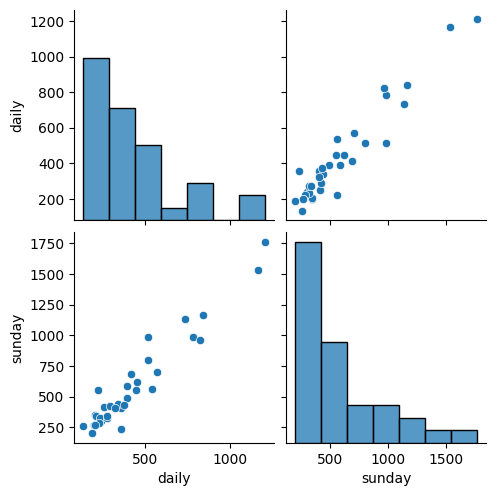

In [20]:
sns.pairplot(df)

### Split the data

In [21]:
x = df.drop(['sunday'],axis = 1) 

y = df['sunday']

In [23]:
from sklearn.model_selection import train_test_split

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8, random_state=123456
)

### Model Building

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [30]:
y_pred = model.predict(x_test)
y_pred

array([1061.21926861,  380.70847801,  284.2704509 ,  378.61316413,
       1137.72501956,  704.48940094,  333.43128393])

### model evaluation

In [31]:
from sklearn.metrics import mean_absolute_error
mas =mean_absolute_error(y_test,y_pred)
mas

75.88431786884927

In [32]:
from sklearn.metrics import root_mean_squared_error
rmse =root_mean_squared_error(y_test,y_pred)
rmse

113.64933815595359

In [33]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse

12916.172063286289

In [34]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.9052921226605876

### output visualization

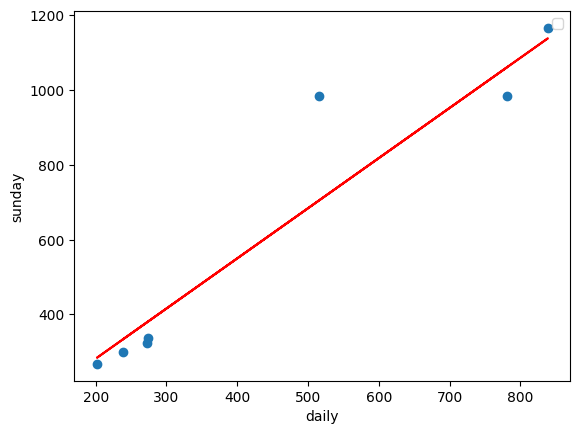

In [36]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color = "red")
plt.xlabel('daily')
plt.ylabel('sunday')
plt.legend()